In [1]:
import networkx as nx
import numpy as np
import grakel as gk # graph kernels module
import matplotlib.pyplot as plt
import scipy
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
import math
from tqdm import tqdm # Estimation of loop time
from datetime import datetime
import os, sys

In [9]:
df = pd.read_pickle("../data/SBM/wl_oa_10samples.pkl")
df.head(10)

Index(['B', 'H0_true', 'N', 'alpha', 'kernel', 'lambda', 'm', 'n',
       'nr_nodes_1', 'nr_nodes_2', 'p1', 'p2', 'power_avg_clustering',
       'power_avg_degree', 'power_avg_neigh_degree', 'power_distfree_b',
       'power_distfree_u', 'power_max_degree', 'power_permutation_b',
       'power_permutation_u', 'power_transitivity', 'run_time', 'timestap'],
      dtype='object')

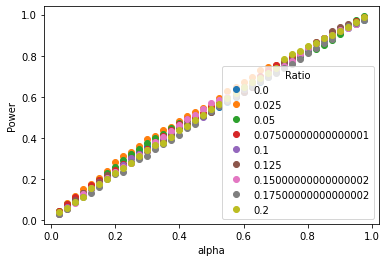

In [8]:
fig, ax = plt.subplots()

for i in np.unique(df['lambda']):
    ax.plot(df['alpha'].loc[(df['lambda'] == i)], df['power_permutation_b'].loc[(df['lambda'] == i)], 'o', label=str(i))

# lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_u'].loc[(df['p_edge_1'] == p)], 'x', label='rejections_u')
# lines, = ax.plot(df['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_statistic_b'].loc[(df['p_edge_1'] == p)], '*', label='rejections_statistic_b')
# lines, = ax.plot(df['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_statistic_u'].loc[(df['p_edge_1'] == p)], '+', label='rejections_statistic_u')


ax.legend(title = 'Lambda')
ax.set_xlabel('alpha')
ax.set_ylabel('Power')
plt.show()